In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('./Dataset/spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count            

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# Explore the distribution of target variable/classes
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Check datatypes
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [10]:
# Removing the unnecessary columns/features
df = df.iloc[:, :2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.columns = ['Category', 'Message']

In [12]:
df = df.sample(df.shape[0])
df

,Category,Message
3074,ham,Take us out shopping and Mark will distract Is...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
3126,ham,Thats cool. i liked your photos. You are very ...
965,ham,Or better still can you catch her and let ask ...
793,ham,Omg I want to scream. I weighed myself and I l...
...,...,...
2197,ham,Bring it if you got it
3184,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...
2229,ham,haha but no money leh... Later got to go for t...
4716,ham,"K will do, addie &amp; I are doing some art so..."


In [13]:
# Split the dataset into features (X) and target variable (y)
X = df['Message']
y = df['Category']

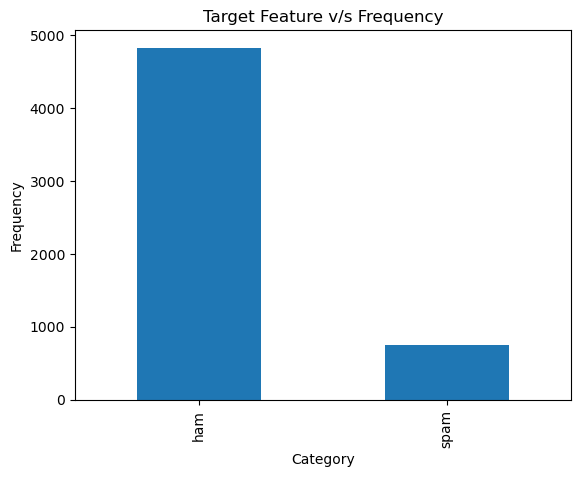

In [14]:
y.value_counts().plot(kind = "bar")
plt.title('Target Feature v/s Frequency')
plt.ylabel('Frequency')
plt.show()

In [15]:
print("Independent feature shape: ", X.shape)
print("Dependent feature shape: ", y.shape)

Independent feature shape:  (5572,)
Dependent feature shape:  (5572,)


In [16]:
# Split the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
print("Independent feature shape: ", X_train.shape)
print("Dependent feature shape: ", y_train.shape)

Independent feature shape:  (4457,)
Dependent feature shape:  (4457,)


In [18]:
print("Independent feature shape: ", X_train.shape)
print("Dependent feature shape: ", y_train.shape)

Independent feature shape:  (4457,)
Dependent feature shape:  (4457,)


In [19]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [20]:
tfidf = TfidfVectorizer() # (can also use count vectorizer)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
pd.DataFrame(y_train).sample(10)

,0
4249,0
750,0
3586,0
2941,0
1774,1
2454,0
178,0
614,0
1720,0
181,0


In [22]:
print(X_train_tfidf)

  (0, 3083)	0.7235290496197667
  (0, 3707)	0.2612980146218199
  (0, 1520)	0.5723900867291916
  (0, 7615)	0.28389901466042644
  (1, 6158)	0.22534453876913027
  (1, 4186)	0.2485148763402542
  (1, 870)	0.20028189147561765
  (1, 6842)	0.23973946983235303
  (1, 1060)	0.13012651078901594
  (1, 7319)	0.13920914198397127
  (1, 4508)	0.271850571739971
  (1, 6719)	0.10136085212256085
  (1, 2924)	0.11849051889352819
  (1, 4142)	0.2192451541986084
  (1, 1190)	0.19895593726965755
  (1, 4452)	0.1983103075852568
  (1, 3602)	0.11071720175762753
  (1, 6123)	0.21118711824826894
  (1, 2292)	0.1799926745466668
  (1, 7357)	0.17771914146313422
  (1, 3138)	0.23602409450554473
  (1, 2176)	0.15949835891292213
  (1, 3458)	0.1815895990881259
  (1, 971)	0.10941034526509848
  (1, 7610)	0.2499039821118186
  :	:
  (4455, 6731)	0.11665050215845742
  (4455, 3719)	0.09028880054255338
  (4455, 4913)	0.10206791252466099
  (4455, 7319)	0.10486671731995822
  (4455, 4604)	0.08848399957898172
  (4455, 3707)	0.083862843358876

In [23]:
# Multinomial NB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [34]:
def calculate_accuracy(y_pred, y_test):
  print(accuracy_score(y_pred, y_test))
  print(classification_report(y_pred, y_test))

In [25]:
# Predict the test set (Test set predictions)
y_test_pred = mnb.predict(X_test_tfidf)
label_encoder.inverse_transform(y_test_pred)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
print(y_test_pred.shape), print(y_test.shape)

(1115,)
(1115,)


(None, None)

In [35]:
calculate_accuracy(y_test_pred, y_test)

0.9614349775784753
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1010
           1       0.71      1.00      0.83       105

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [30]:
# On training data
y_train_pred = mnb.predict(X_train_tfidf)
label_encoder.inverse_transform(y_train_pred)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [31]:
print(y_train_pred.shape)
print(y_train.shape)

(4457,)
(4457,)


In [38]:
calculate_accuracy(y_train_pred, y_train)

0.9728516939645502
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3979
           1       0.80      1.00      0.89       478

    accuracy                           0.97      4457
   macro avg       0.90      0.98      0.94      4457
weighted avg       0.98      0.97      0.97      4457



In [71]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(mnb, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9562440548987634

In [51]:
# Logistic Regression (96.32286995515695)
params = {
  'C' : [0.01, 0.1, 1]
}
lr = LogisticRegression()

grid_search = GridSearchCV(lr, params, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

lr_best = grid_search.best_estimator_
lr_best.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
y_pred_val_lr = lr_best.predict(X_test_tfidf)

calculate_accuracy(y_pred_val_lr, y_test)

Best Parameters: {'C': 1}
Validation Accuracy: 0.9632286995515695


In [72]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(lr_best, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9564697800123809

In [52]:
# SVM (98.47533632286996)
params = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svm = SVC()

grid_search = GridSearchCV(svm, params, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

svm_best = grid_search.best_estimator_
svm_best.fit(X_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred_val_svm = svm_best.predict(X_test_tfidf)


calculate_accuracy(y_pred_val_svm, y_test)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Validation Accuracy: 0.9847533632286996


In [73]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(svm_best, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9807031450529209

In [68]:
# DecisionTree (96.05381165919282)

dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

dt_best = grid_search.best_estimator_
y_pred_test_dt = dt_best.predict(X_test_tfidf)

print("Best Parameters:", grid_search.best_params_)

calculate_accuracy(y_pred_test_dt, y_test)

Decision Trees Test Accuracy: 0.9605381165919282
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [74]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(dt_best, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9627523365191527

In [77]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

y_pred_test_rf = rf.predict(X_test_tfidf)
calculate_accuracy(y_test, y_pred_test_rf)

Random Forest Test Accuracy: 0.9730941704035875


In [78]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(rf, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9762148138082368

In [85]:
# Gradient Boosting (96.95067264573991)
gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

gb = GradientBoostingClassifier(**gb_params)

gb.fit(X_train_tfidf, y_train)

y_pred_test_gb = gb.predict(X_test_tfidf)

calculate_accuracy(y_pred_test_gb, y_test)
print("Best Parameters:", gb_params)

Gradient Boosting Test Accuracy: 0.9695067264573991
Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [86]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(gb, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9753171978881994

In [81]:
# XGBoost (97.30941704035875)
xgb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 0.1
}

xgb_model = XGBClassifier(objective='binary:logistic')
xgb_model.fit(X_train_tfidf, y_train)

y_pred_test_xgb = xgb_model.predict(X_test_tfidf)
test_acc_xgb = accuracy_score(y_test, y_pred_test_xgb)
calculate_accuracy(y_train_pred, y_train)
print("XGBoost Test Accuracy:", test_acc_xgb)

XGBoost Test Accuracy: 0.9730941704035875


In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(xgb_model, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9798055291328833

In [88]:
# Voting Ensemble (97.39910313901345)
vc = VotingClassifier(estimators = [
  ('svm', SVC(C = 1, kernel = 'linear')),
  ('xgb', XGBClassifier(objective='binary:logistic')),
  ('gb', GradientBoostingClassifier(n_estimators= 200, learning_rate = 0.1, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1))
])
vc.fit(X_train_tfidf, y_train)

y_pred_test_vc = vc.predict(X_test_tfidf)
test_acc_vc = accuracy_score(y_test, y_pred_test_vc)
calculate_accuracy(y_train_pred, y_train)
print("XGBoost Test Accuracy:", test_acc_vc)

XGBoost Test Accuracy: 0.9739910313901345


In [89]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
vectorizer_scores = cross_val_score(vc, X_train_tfidf, y_train, cv=kfold)
np.mean(vectorizer_scores)

0.9813752875038375

In [91]:
# Example 1
email = ['''
    You won a reward
''']

# Predict for the new data
prediction_1 = svm_best.predict(tfidf.transform(email))
label_encoder.inverse_transform(prediction_1)

array(['spam'], dtype=object)

In [65]:
# Example 2
email = ['''
    Lets go for a walk!
''']

# Predict for the new data
prediction_2 = svm_best.predict(tfidf.transform(email))
label_encoder.inverse_transform(prediction_2)

array(['ham'], dtype=object)